In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

In [2]:
import pandas as pd


file_path = r".\Data\Placement_Data_Full_Class.csv"

df = pd.read_csv(file_path)
df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


<Axes: ylabel='status'>

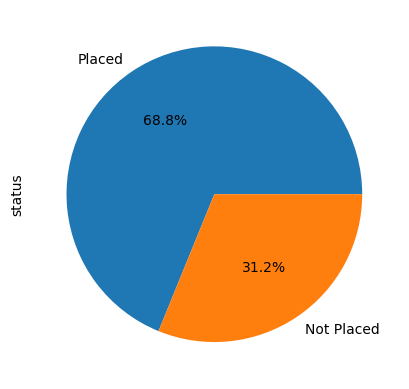

In [3]:
df.status.value_counts().plot(kind="pie",autopct="%.1f%%")

<Axes: xlabel='gender'>

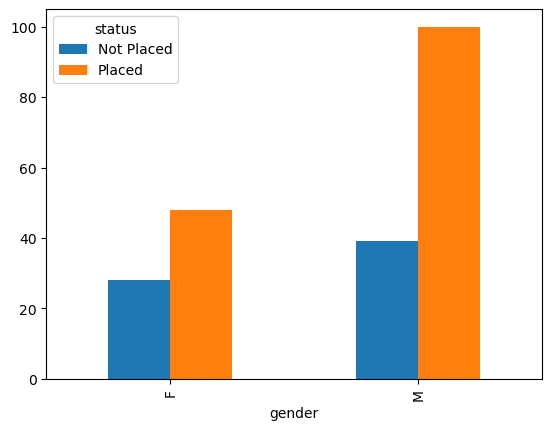

In [4]:
pd.crosstab(df["gender"],df["status"]).plot(kind="bar")

<Axes: xlabel='ssc_b'>

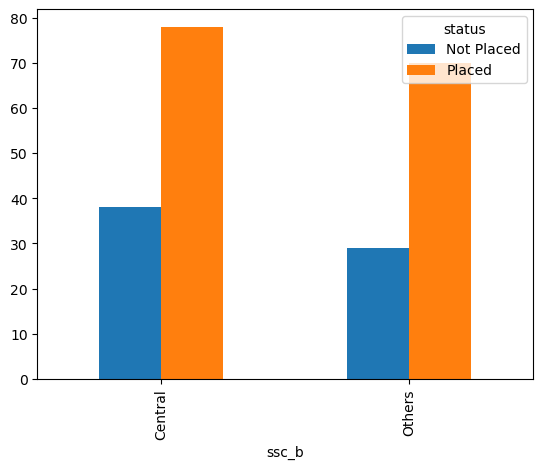

In [5]:
pd.crosstab(df["ssc_b"],df["status"]).plot(kind="bar")

<Axes: xlabel='hsc_b'>

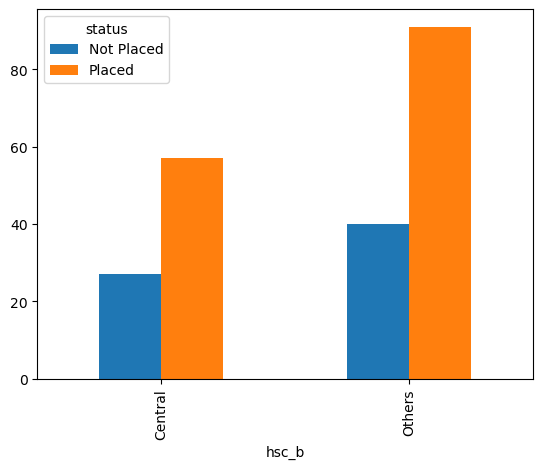

In [6]:
pd.crosstab(df["hsc_b"],df["status"]).plot(kind="bar")

<Axes: xlabel='degree_t'>

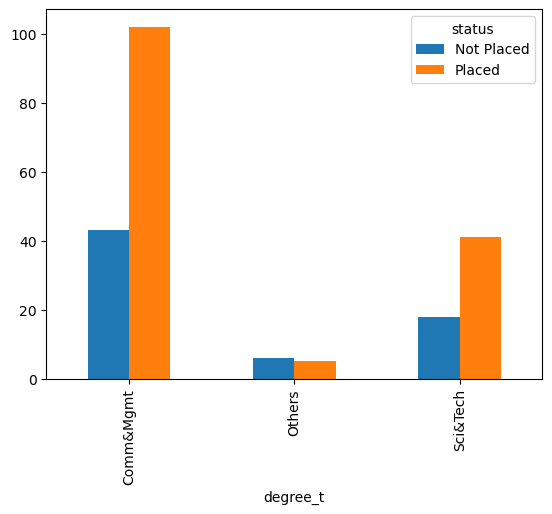

In [7]:
pd.crosstab(df["degree_t"],df["status"]).plot(kind="bar")

<Axes: xlabel='specialisation'>

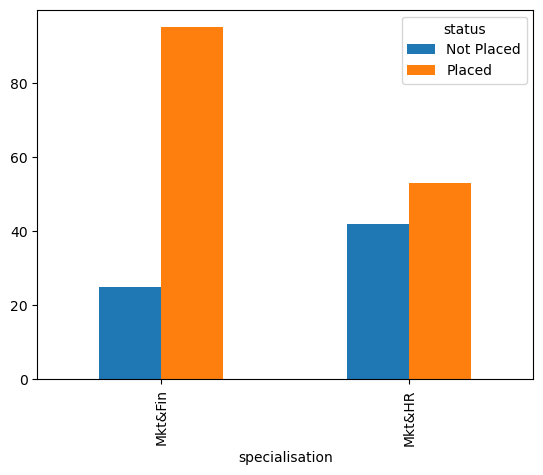

In [8]:
pd.crosstab(df["specialisation"],df["status"]).plot(kind="bar")

In [9]:
!pip install seaborn

<Axes: xlabel='ssc_p', ylabel='hsc_p'>

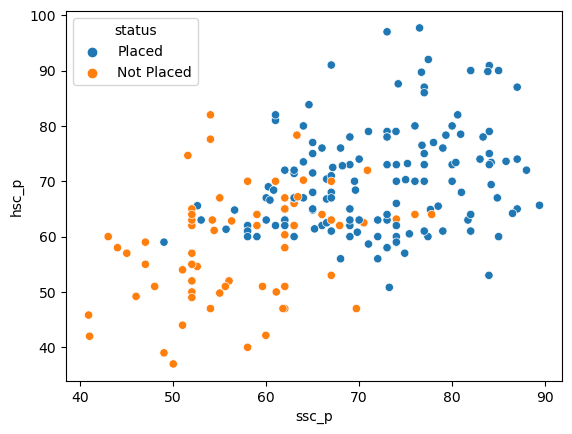

In [10]:
import seaborn as sns

sns.scatterplot(x=df['ssc_p'], y=df['hsc_p'], hue=df['status'])

<Axes: xlabel='hsc_p', ylabel='degree_p'>

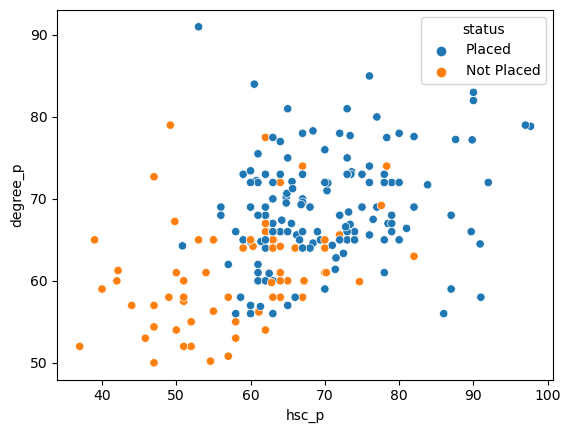

In [11]:
sns.scatterplot(x=df['hsc_p'], y=df['degree_p'], hue=df['status'])

In [12]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


<Axes: xlabel='degree_p', ylabel='etest_p'>

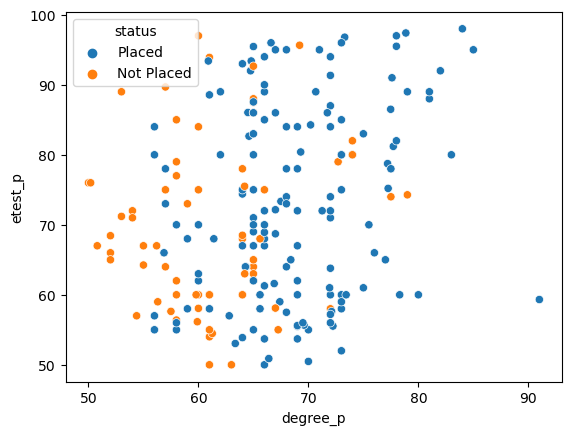

In [14]:
sns.scatterplot(x=df['degree_p'], y=df['etest_p'], hue=df['status'])

---------------------------------

---------------------------------

---------------------------------

# CLEANING / PRE-PROCESSING STARTS

In [15]:

df['total_academic_performance'] = df['ssc_p'] + df['hsc_p'] + df['degree_p']  
#feature engineering


In [16]:
df.isna().sum()         #CHECKING FOR MISSING VALUES

sl_no                          0
gender                         0
ssc_p                          0
ssc_b                          0
hsc_p                          0
hsc_b                          0
hsc_s                          0
degree_p                       0
degree_t                       0
workex                         0
etest_p                        0
specialisation                 0
mba_p                          0
status                         0
salary                        67
total_academic_performance     0
dtype: int64

Salary has 67 missing values

In [17]:
df.drop("salary", axis=1, inplace=True) # salary is an outcome after placement prediction as well as there is no salary for Not placed category so prediction will become complex or biased.
df.drop("sl_no", axis=1, inplace=True) #yet another irrelevant column

In [18]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)                        #remove duplicates

In [19]:

df = df.apply(lambda x: x.fillna(0))       #FILL NULL ROWS WITH 0                                                            


df.dropna(inplace=True)                        #drop null rows


-------------------------------

ENCODING STARTS

In [20]:
from sklearn.preprocessing import LabelEncoder                 #encoding categorical values

le = LabelEncoder()
categories = ['gender','ssc_b','hsc_b','degree_t','workex','specialisation','status','hsc_s']
for i in categories:
    df[i] = le.fit_transform(df[i])
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,total_academic_performance
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,216.00
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,235.14
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,197.00
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,160.00
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,232.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,240.20
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,190.00
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,207.00
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,198.00


In [21]:
#one hot encoding                                                                               ALTERNATE ENCODING                          
#categories = ['gender','ssc_b','hsc_b','degree_t','workex','specialisation','status','hsc_s']
#df = pd.get_dummies(df, columns=categories)
#print(df)

ENCODING ENDS

--------------------------------------

SCALING STARTS

In [22]:
# MinMaxScaler
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X = df.drop("status", axis=1)
#y = df["status"]
#X_sc = scaler.fit_transform(X)
#X_sc

In [23]:
#Standardisation (better scaling technique compared to minmax for Logisticregression model)

from sklearn.preprocessing import StandardScaler
y = df["status"]
X = df.drop("status", axis=1)
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)


SCALING ENDS

------------------------------------------

In [24]:

#OUTLIER DETECTION

z_scores = np.abs((df - df.mean()) / df.std())   #z score


threshold = 3


outlier_indices = np.where(z_scores > threshold)


print(outlier_indices)


(array([197], dtype=int64), array([6], dtype=int64))


In [25]:
#OUTLIER REMOVAL 

percentiles = df.quantile([0.05, 0.95])

trimmed_data = df.apply(lambda x: x[(x >= percentiles.loc[0.05, x.name]) & (x <= percentiles.loc[0.95, x.name])], axis=0)

# Print 
print(trimmed_data)

     gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  67.00      1    NaN      1    1.0     58.00         2       0   
1         1  79.33      0  78.33      1    2.0     77.48         2       1   
2         1  65.00      0  68.00      0    NaN     64.00         0       0   
3         1  56.00      0  52.00      0    2.0       NaN         2       0   
4         1    NaN      0  73.60      0    1.0     73.30         0       0   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
210       1  80.60      1  82.00      1    1.0     77.60         0       0   
211       1  58.00      1  60.00      1    2.0     72.00         2       0   
212       1  67.00      1  67.00      1    1.0     73.00         0       1   
213       0  74.00      1  66.00      1    1.0     58.00         0       0   
214       1  62.00      0  58.00      1    2.0       NaN         0       0   

     etest_p  specialisation  mba_p  status  total_academic_per

------------------------------------

SPLITTING INTO TRAIN AND TEST

In [26]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train,y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((172, 13), (43, 13), (172,), (43,))

----------------------------------------

APPLYING REGULARISATION METHODS TO OVERCOME OVERFITTING

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [0.1, 1.0, 10.0]
}

lr_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)



grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



Best Hyperparameters: {'C': 10.0, 'penalty': 'l1'}
Best Score: 0.8778151260504201


This process helped to find the optimal set of hyperparameters that yields the highest accuracy for the logistic regression model on the training data and to fine-tune the model's performance. 

In [28]:
#L1 REGULARISATION

from sklearn.linear_model import LogisticRegression


lr_model_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)


lr_model_l1.fit(X_train, y_train)


train_accuracy = lr_model_l1.score(X_train, y_train)
test_accuracy = lr_model_l1.score(X_test, y_test)
print("L1 Regularization Train Accuracy:", train_accuracy)
print("L1 Regularization Test Accuracy:", test_accuracy)


L1 Regularization Train Accuracy: 0.8895348837209303
L1 Regularization Test Accuracy: 0.8837209302325582


In [29]:
# L2 REGULARISATION

from sklearn.linear_model import LogisticRegression

lr_model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42)

lr_model_l2.fit(X_train, y_train)

train_accuracy = lr_model_l2.score(X_train, y_train)
test_accuracy = lr_model_l2.score(X_test, y_test)
print("L2 Regularization Train Accuracy:", train_accuracy)
print("L2 Regularization Test Accuracy:", test_accuracy)


L2 Regularization Train Accuracy: 0.9011627906976745
L2 Regularization Test Accuracy: 0.8837209302325582


-------------------------------------

Oversampling is now done to overcome class imbalance by increasing instances in the minority class, thereby enhancing model performance.

In [30]:
!pip install imblearn

In [31]:
#OVERSAMPLING

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

oversampler = RandomOverSampler(random_state=42)

X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)





-----------------------------------------

In [32]:
#DIMENSIONALITY REDUCTION TECHNIQUE 1      (data reduce)

from sklearn.decomposition import PCA


pca = PCA(n_components=2)


X_pca = pca.fit_transform(X)





The above utilizes PCA from scikit-learn to reduce data dimensions to two components in variable X_pca.

In [33]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'


In [34]:
#DIMENSIONALITY REDUCTION TECHNIQUE 2 (data visualisation)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30) 


X_tsne = tsne.fit_transform(X)




The above code uses t-SNE focuses on visualizing high-dimensional data in a lower-dimensional space while preserving local relationships between data points.

# CLEANING / PRE-PROCESSING ENDS

---------------------------------

---------------------------------

-----------------------------------------------------

# Modelling

We will be experimenting different models and choose some models from those for hyper parameter tuning. The models which we will test are listed below:
* KNNClassifier
* SVC
* LogisticRegression
* RandomForestClassifier
* DecisionTreeClassifier
* Naive Bayes


In [35]:
models =dict()

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
models['RandomForestClassifier Training Score'] = clf.score(X_train,y_train)
models['RandomForestClassifier Test Score'] = clf.score(X_test,y_test)
models

{'RandomForestClassifier Training Score': 1.0,
 'RandomForestClassifier Test Score': 0.7674418604651163}

<h1 style="font-size: 22px;">SVC</h1>

In [37]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(dual='auto',random_state=42)
lsvc.fit(X_train, y_train)
models['LinearSVC Training Score'] = lsvc.score(X_train,y_train)
models['LinearSVC Test Score'] = lsvc.score(X_test,y_test)
models

{'RandomForestClassifier Training Score': 1.0,
 'RandomForestClassifier Test Score': 0.7674418604651163,
 'LinearSVC Training Score': 0.9011627906976745,
 'LinearSVC Test Score': 0.8837209302325582}

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
models['LogisticRegression Training Score'] = lr_model.score(X_train,y_train)
models['LogisticRegression Test Score'] = lr_model.score(X_test,y_test)
models





{'RandomForestClassifier Training Score': 1.0,
 'RandomForestClassifier Test Score': 0.7674418604651163,
 'LinearSVC Training Score': 0.9011627906976745,
 'LinearSVC Test Score': 0.8837209302325582,
 'LogisticRegression Training Score': 0.9011627906976745,
 'LogisticRegression Test Score': 0.8837209302325582}

## Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  
models['NaiveBayes Training Score'] = classifier.score(X_train,y_train)
models['NaiveBayes Test Score'] = classifier.score(X_test,y_test)
models

{'RandomForestClassifier Training Score': 1.0,
 'RandomForestClassifier Test Score': 0.7674418604651163,
 'LinearSVC Training Score': 0.9011627906976745,
 'LinearSVC Test Score': 0.8837209302325582,
 'LogisticRegression Training Score': 0.9011627906976745,
 'LogisticRegression Test Score': 0.8837209302325582,
 'NaiveBayes Training Score': 0.8546511627906976,
 'NaiveBayes Test Score': 0.7906976744186046}

## KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  
knn.fit(X_train, y_train)
models['KNN Training Score'] = knn.score(X_train,y_train)
models['KNN Test Score'] = knn.score(X_test,y_test)
models

{'RandomForestClassifier Training Score': 1.0,
 'RandomForestClassifier Test Score': 0.7674418604651163,
 'LinearSVC Training Score': 0.9011627906976745,
 'LinearSVC Test Score': 0.8837209302325582,
 'LogisticRegression Training Score': 0.9011627906976745,
 'LogisticRegression Test Score': 0.8837209302325582,
 'NaiveBayes Training Score': 0.8546511627906976,
 'NaiveBayes Test Score': 0.7906976744186046,
 'KNN Training Score': 0.8953488372093024,
 'KNN Test Score': 0.8372093023255814}

## Decision Tree 

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
models['DecisionTreeClassifier Training Score'] = dt_clf.score(X_train,y_train)
models['DecisionTreeClassifier Test Score'] = dt_clf.score(X_test,y_test)
models

{'RandomForestClassifier Training Score': 1.0,
 'RandomForestClassifier Test Score': 0.7674418604651163,
 'LinearSVC Training Score': 0.9011627906976745,
 'LinearSVC Test Score': 0.8837209302325582,
 'LogisticRegression Training Score': 0.9011627906976745,
 'LogisticRegression Test Score': 0.8837209302325582,
 'NaiveBayes Training Score': 0.8546511627906976,
 'NaiveBayes Test Score': 0.7906976744186046,
 'KNN Training Score': 0.8953488372093024,
 'KNN Test Score': 0.8372093023255814,
 'DecisionTreeClassifier Training Score': 1.0,
 'DecisionTreeClassifier Test Score': 0.8372093023255814}

# GRADIENTBOOSTING CLASSIFIER

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
models['GradientBoostingClassifier Training Score'] = gbc.score(X_train,y_train)
models['GradientBoostingClassifier Test Score'] = gbc.score(X_test,y_test)
models

{'RandomForestClassifier Training Score': 1.0,
 'RandomForestClassifier Test Score': 0.7674418604651163,
 'LinearSVC Training Score': 0.9011627906976745,
 'LinearSVC Test Score': 0.8837209302325582,
 'LogisticRegression Training Score': 0.9011627906976745,
 'LogisticRegression Test Score': 0.8837209302325582,
 'NaiveBayes Training Score': 0.8546511627906976,
 'NaiveBayes Test Score': 0.7906976744186046,
 'KNN Training Score': 0.8953488372093024,
 'KNN Test Score': 0.8372093023255814,
 'DecisionTreeClassifier Training Score': 1.0,
 'DecisionTreeClassifier Test Score': 0.8372093023255814,
 'GradientBoostingClassifier Training Score': 1.0,
 'GradientBoostingClassifier Test Score': 0.7674418604651163}

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=42)
gbc.fit(X_train, y_train)
gbc.score(X_test,y_test)

0.7906976744186046

# ADABOOSTCLASSIFIER

In [44]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
models['AdaBoostClassifier Training Score'] = ada.score(X_train,y_train)
models['AdaBoostClassifier Test Score'] = ada.score(X_test,y_test)
models

{'RandomForestClassifier Training Score': 1.0,
 'RandomForestClassifier Test Score': 0.7674418604651163,
 'LinearSVC Training Score': 0.9011627906976745,
 'LinearSVC Test Score': 0.8837209302325582,
 'LogisticRegression Training Score': 0.9011627906976745,
 'LogisticRegression Test Score': 0.8837209302325582,
 'NaiveBayes Training Score': 0.8546511627906976,
 'NaiveBayes Test Score': 0.7906976744186046,
 'KNN Training Score': 0.8953488372093024,
 'KNN Test Score': 0.8372093023255814,
 'DecisionTreeClassifier Training Score': 1.0,
 'DecisionTreeClassifier Test Score': 0.8372093023255814,
 'GradientBoostingClassifier Training Score': 1.0,
 'GradientBoostingClassifier Test Score': 0.7674418604651163,
 'AdaBoostClassifier Training Score': 1.0,
 'AdaBoostClassifier Test Score': 0.8372093023255814}

In [45]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=1000, learning_rate=1,random_state=42)
ada.fit(X_train, y_train)
ada.score(X_test,y_test)

0.8372093023255814

# XGB CLASSIFIER

In [46]:
!pip install xgboost

In [47]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
models['XGBClassifier Training Score'] = xgbc.score(X_train,y_train)
models['XGBClassifier Test Score'] = xgbc.score(X_test,y_test)
models

{'RandomForestClassifier Training Score': 1.0,
 'RandomForestClassifier Test Score': 0.7674418604651163,
 'LinearSVC Training Score': 0.9011627906976745,
 'LinearSVC Test Score': 0.8837209302325582,
 'LogisticRegression Training Score': 0.9011627906976745,
 'LogisticRegression Test Score': 0.8837209302325582,
 'NaiveBayes Training Score': 0.8546511627906976,
 'NaiveBayes Test Score': 0.7906976744186046,
 'KNN Training Score': 0.8953488372093024,
 'KNN Test Score': 0.8372093023255814,
 'DecisionTreeClassifier Training Score': 1.0,
 'DecisionTreeClassifier Test Score': 0.8372093023255814,
 'GradientBoostingClassifier Training Score': 1.0,
 'GradientBoostingClassifier Test Score': 0.7674418604651163,
 'AdaBoostClassifier Training Score': 1.0,
 'AdaBoostClassifier Test Score': 0.8372093023255814,
 'XGBClassifier Training Score': 1.0,
 'XGBClassifier Test Score': 0.813953488372093}

In [48]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(eta=0.2,max_depth=10, random_state=42)
xgbc.fit(X_train, y_train)
xgbc.score(X_test,y_test)

0.7906976744186046

---------------------------------------

<BarContainer object of 18 artists>

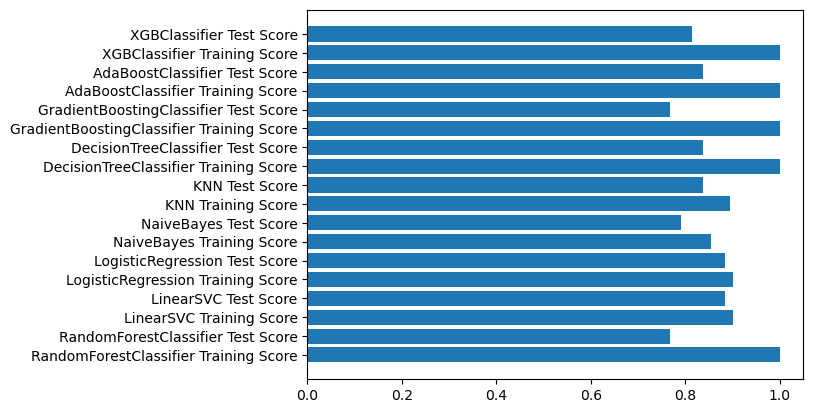

In [49]:
plt.barh(list(models.keys()),list(models.values()))

--------------------------

--------------------

Now its time for hyperparameter tuning. KNN model is eliminated as it is having low score among all other test. Hyperparameter tuning will be done in following order:
* LinearSVC
* LogisticRegression
* DecisionTreeClassifier
* NaiveBayes
* RandomForestClassifier

## LinearSVC HyperParameterTuning


In [50]:
from sklearn.svm import LinearSVC
lsvc_h = LinearSVC(C=40,dual='auto',random_state=42)
lsvc_h.fit(X_train, y_train)
print("Training score: ",lsvc_h.score(X_train,y_train),"\nTest score: ",lsvc_h.score(X_test,y_test))

Training score:  0.9011627906976745 
Test score:  0.8837209302325582


-------------------------------

## Logistic regression HyperParameter Tuning

In [51]:
from sklearn.linear_model import LogisticRegression
lr_model_h = LogisticRegression(C=10,multi_class='ovr',n_jobs=-1,random_state=42)
lr_model_h.fit(X_train, y_train)
print("Training score: ",lr_model_h.score(X_train,y_train),"\nTest score: ",lr_model_h.score(X_test,y_test))

Training score:  0.8895348837209303 
Test score:  0.8837209302325582


CROSS VALIDATION SCORE FOR LOGISTIC REGRESSION MODEL

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


hyperparameters = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}


lr_model = LogisticRegression(random_state=42)


cross_val_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')


print("Cross-Validation Scores:", cross_val_scores)

average_score = cross_val_scores.mean()
print("Average Cross-Validation Score:", average_score)


Cross-Validation Scores: [0.85714286 0.94285714 0.88235294 0.85294118 0.85294118]
Average Cross-Validation Score: 0.8776470588235293


Cross-validation after Hyperparameter tuning helps in reducing the risk of overfitting and provides a more accurate assessment of how the model would perform on unseen data. In this case, the average cross-validation score (0.8776) is consistent, indicating that the model is not overfitting.

---------------------------------

# DECISIONTREECLASSIFIER HyperParameterTuning

In [53]:
from sklearn.model_selection import GridSearchCV

clf_h = DecisionTreeClassifier(random_state=42)
params =  {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [1, 2, 3, 5, 7]
}
grid = GridSearchCV(estimator=clf_h,
                    param_grid=params,
                    cv=10,
                    n_jobs=-1,
                    verbose=2)
grid.fit(X_train, y_train)
print("Training score: ",grid.score(X_train,y_train),"\nTest score: ",grid.score(X_test,y_test))


Fitting 10 folds for each of 15 candidates, totalling 150 fits
Training score:  0.872093023255814 
Test score:  0.7441860465116279


-----------------------

# NAIVE BAYES HyperParameterTuning


In [54]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
grid_nb = GridSearchCV(estimator=GaussianNB(),
                    param_grid=param_grid_nb,
                    cv=10,
                    n_jobs=-1,
                    verbose=2)
grid_nb.fit(X_train, y_train)
print("Training score: ",grid_nb.score(X_train,y_train),"\nTest score: ",grid_nb.score(X_test,y_test))
grid_nb.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Training score:  0.8662790697674418 
Test score:  0.7906976744186046


{'var_smoothing': 0.657933224657568}

--------------------------------

# VOTING CLASSIFIER 

-BASE MODELS combined from logistic regression model and svc model (since both of them has the highest training and testing scores)

In [55]:



from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


base_models = [
    ('logreg', LogisticRegression()),
    ('svc', SVC(probability=True))
]


voting_model = VotingClassifier(estimators=base_models, voting='soft')


voting_model.fit(X_train, y_train)


accuracy = voting_model.score(X_test, y_test)
print("Voting Classifier Accuracy:", accuracy)


Voting Classifier Accuracy: 0.8604651162790697


------------------------------------

# NEURAL NETWORK MODEL

----------------------

In [56]:
!pip install tensorflow

In [57]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Network build
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train
model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test))


y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred)
print("Neural Network Accuracy:", accuracy)


Epoch 1/50
11/11 [==============================] - 3s 55ms/step - loss: 0.5976 - accuracy: 0.7267 - val_loss: 0.5700 - val_accuracy: 0.7209
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4930 - accuracy: 0.7907 - val_loss: 0.5237 - val_accuracy: 0.7442
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4274 - accuracy: 0.8779 - val_loss: 0.4861 - val_accuracy: 0.6744
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.3753 - accuracy: 0.8895 - val_loss: 0.4582 - val_accuracy: 0.6977
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 0.3381 - accuracy: 0.9012 - val_loss: 0.4358 - val_accuracy: 0.7209
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 0.3072 - accuracy: 0.9070 - val_loss: 0.4162 - val_accuracy: 0.7674
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 0.2828 - accuracy: 0.9070 - val_loss: 0.3985 - val_accuracy: 0.7907
Epoch 8/50
11/11 [=

<Axes: ylabel='Feature'>

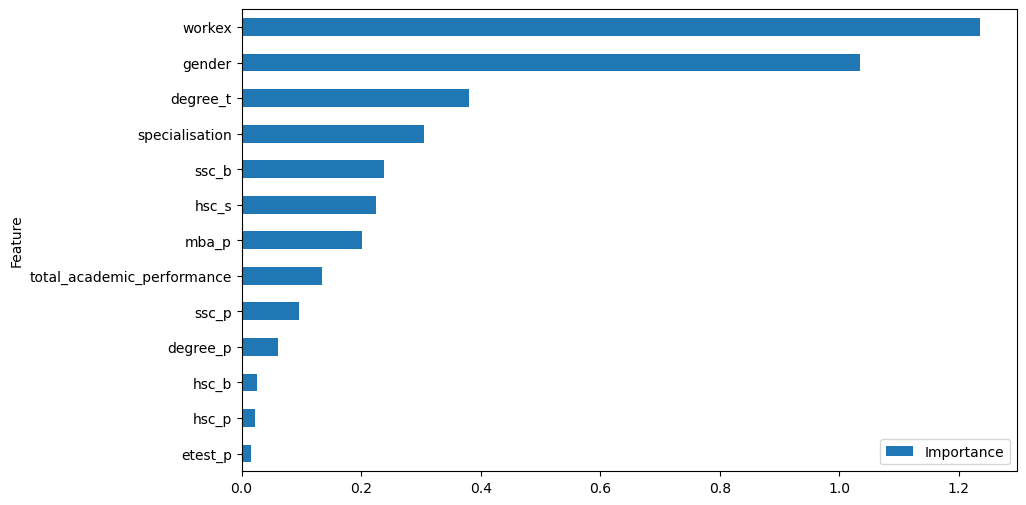

In [67]:
coefficients = lr_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

-----------------------------

-----------------------------------------------------

# PRECISION, RECALL, F1-SCORE AND ROC-AUC METRICS

In [59]:
!pip install --upgrade scikit-learn


In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression



lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)



y_pred = lr_model.predict(X_test)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


if len(set(y_test)) == 2:  # Check if its binary classification
    roc_auc = roc_auc_score(y_test, y_pred)
else:
    roc_auc = None

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
if roc_auc is not None:
    print("ROC-AUC:", roc_auc)


Precision: 0.90625
Recall: 0.9354838709677419
F1-score: 0.9206349206349206
ROC-AUC: 0.842741935483871


-----------------------------

# PLOTTING CURVE TO DETECT UNDERFITTING

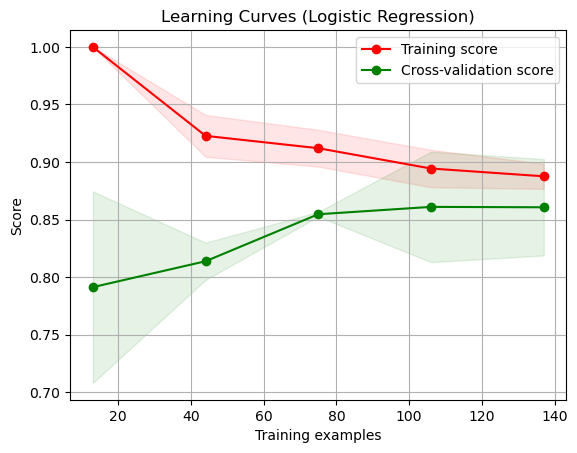

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

model = LogisticRegression(solver='lbfgs', max_iter=1000)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Logistic Regression)"
plot_learning_curve(model, title, X_train, y_train, cv=5)
plt.show()


Since both scores are increasing and converging, it's a positive sign that the model is likely learning well from the data.
Since there is an improvement in both scores as the training set size increases, it suggests that the model has the capacity to learn from the data and doesn't seem to be underfitting. 

------------------------

# FEATURE CORRELATION HEATMAP

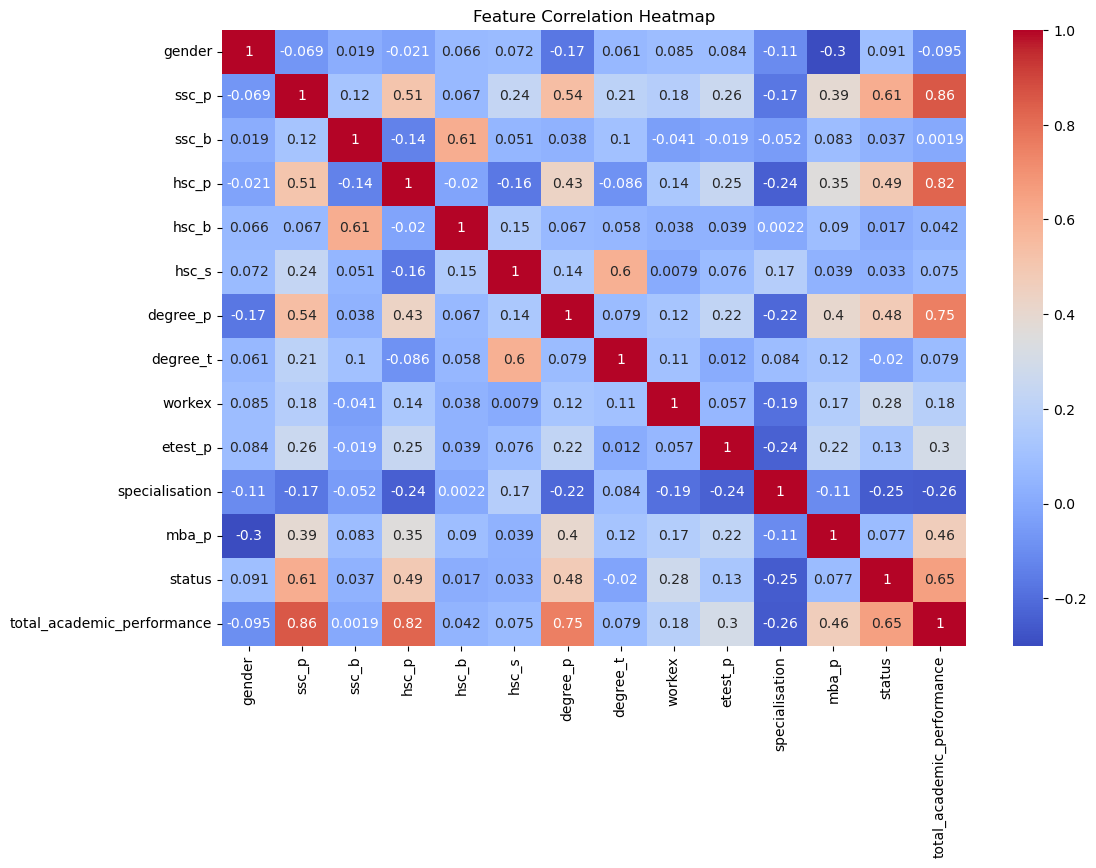

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


---------------------------

# COEFFICIENTS

In [71]:
coef = lr_model.coef_

from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)


coefficients = lr_model.coef_


print("Coefficients:", coefficients)


Coefficients: [[ 1.03404963  0.09611472  0.23861933 -0.02250048 -0.0251518  -0.22530135
   0.06115587 -0.38051709  1.23479178 -0.01555808 -0.30581847 -0.20052911
   0.1347701 ]]


----------------------------------

# PLOT OF COEFFICIENTS OF LOGISTIC REGRESSION MODEL

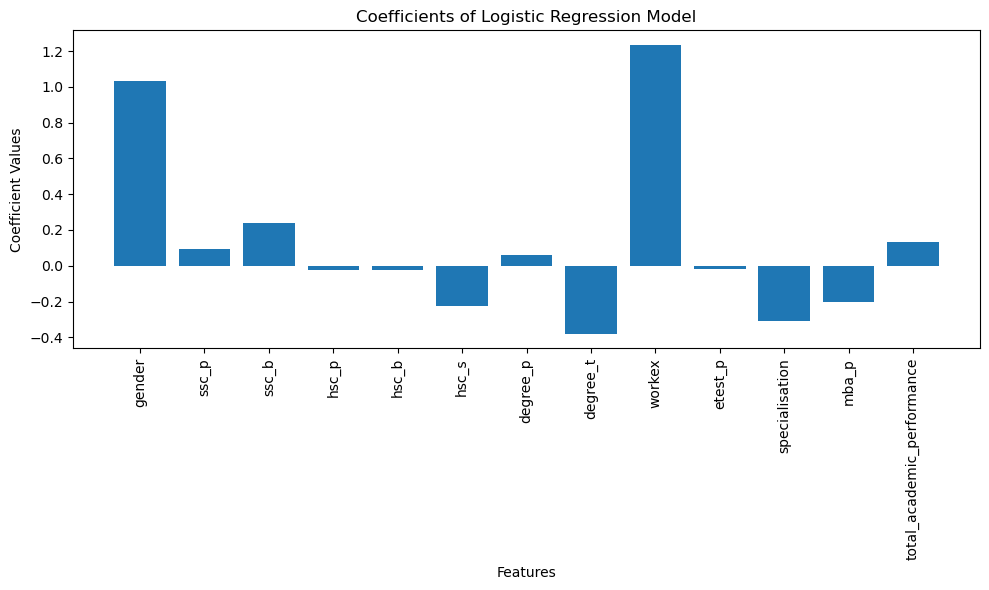

In [72]:
import matplotlib.pyplot as plt
import numpy as np


lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)


coefficients = lr_model.coef_


plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients[0])), coefficients[0])
plt.xticks(range(len(coefficients[0])), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Coefficients of Logistic Regression Model')
plt.tight_layout()
plt.show()


-----------------------------------------

# HEATMAP OF COEFFICIENTS

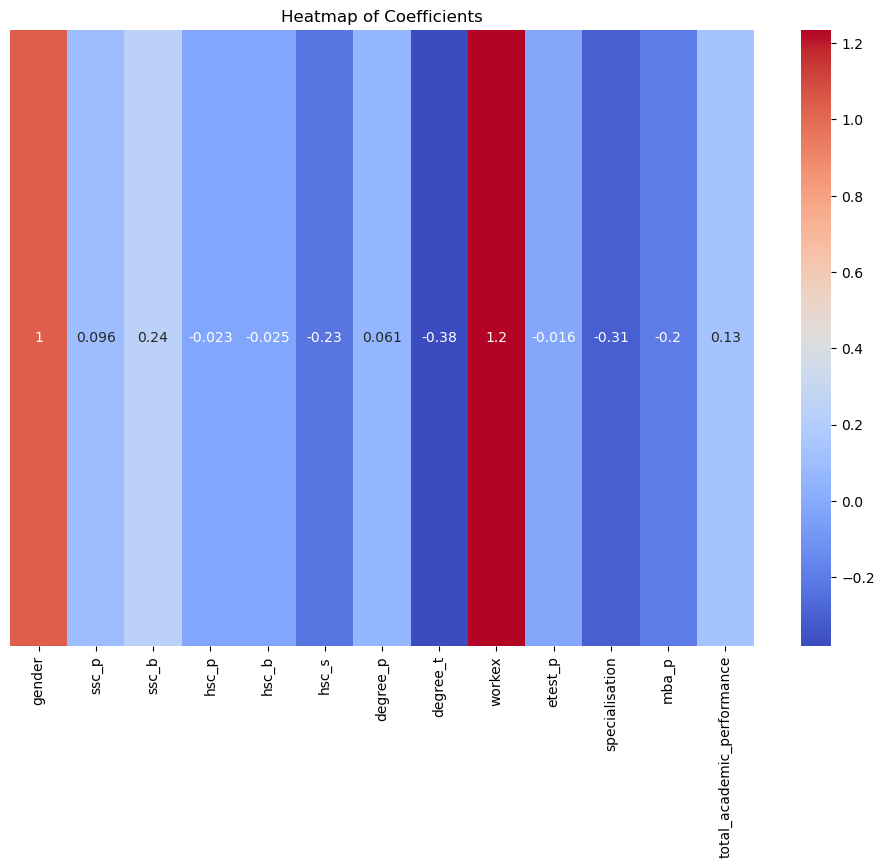

In [73]:
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.heatmap(coefficients, annot=True, cmap='coolwarm', xticklabels=X_train.columns, yticklabels=False)
plt.title('Heatmap of Coefficients')
plt.show()


-------------------------------------------

In [74]:
import pickle
pickle.dump(lr_model, open("Model_placement_full_data_class.pkl","wb"))

Out of these models we got to see that LogisticRegression Hyperparameter Tuned model is 
showing accuracy of 0.8837209 (model =lr_model_h because it has improved training score as well) 